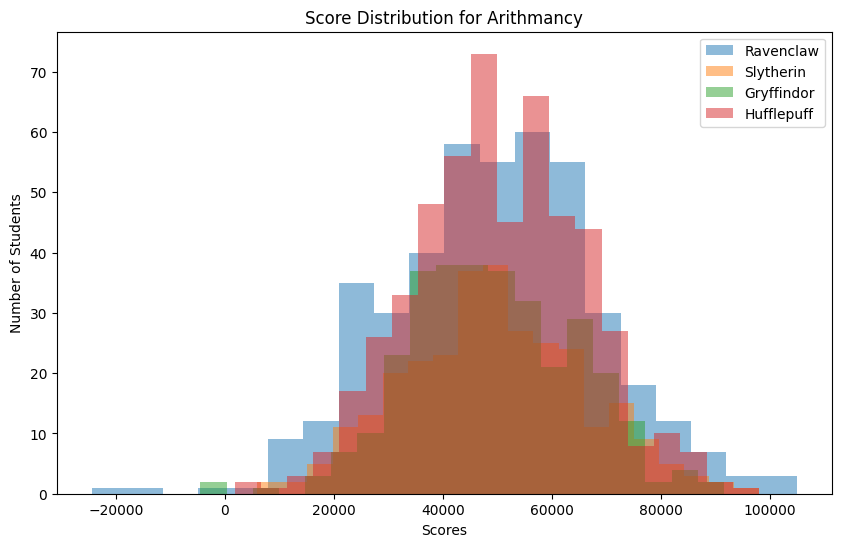

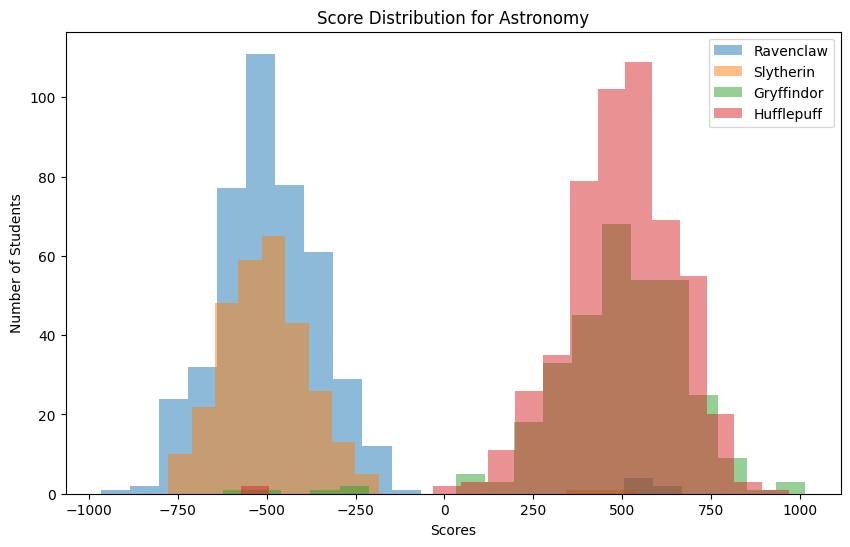

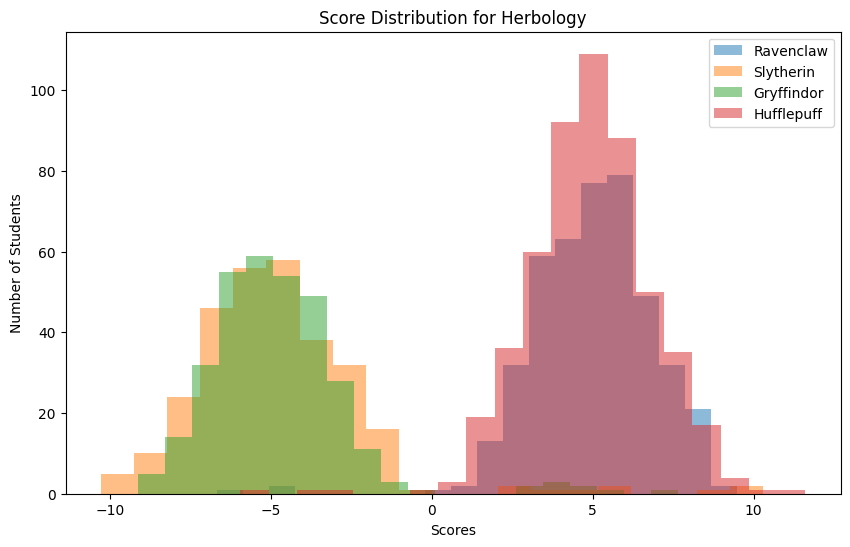

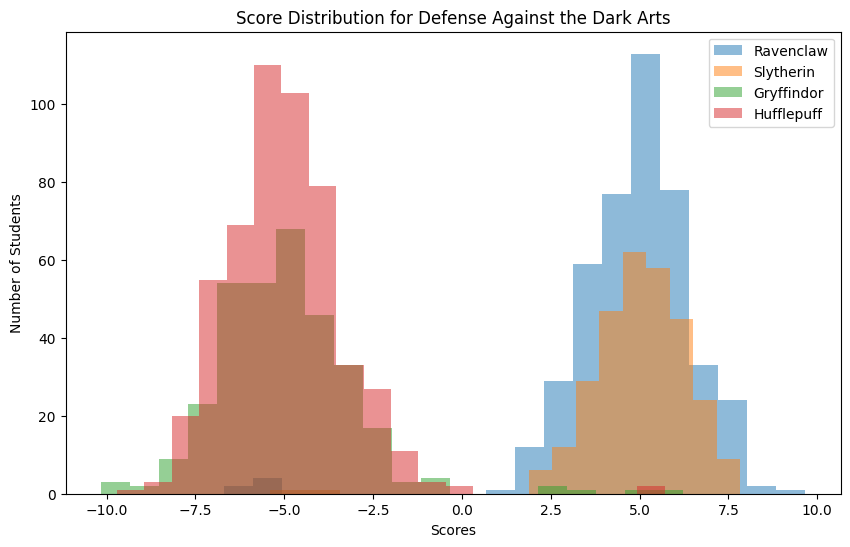

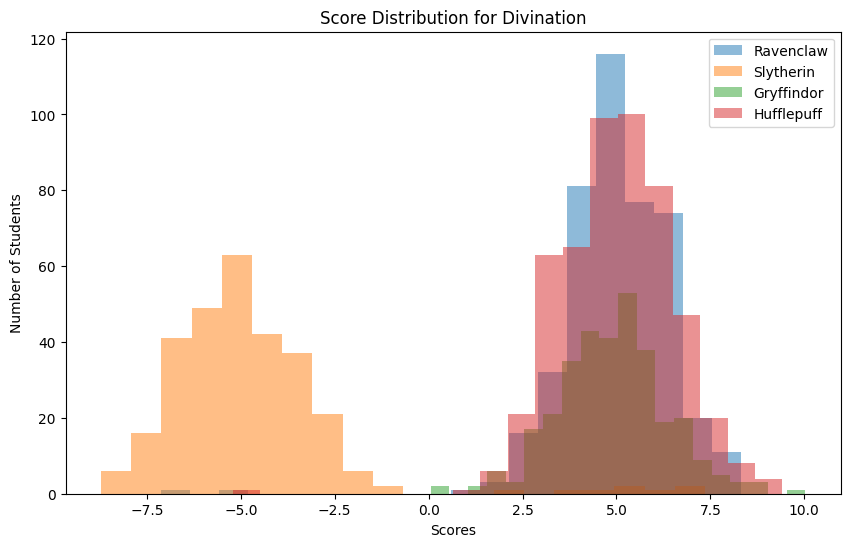

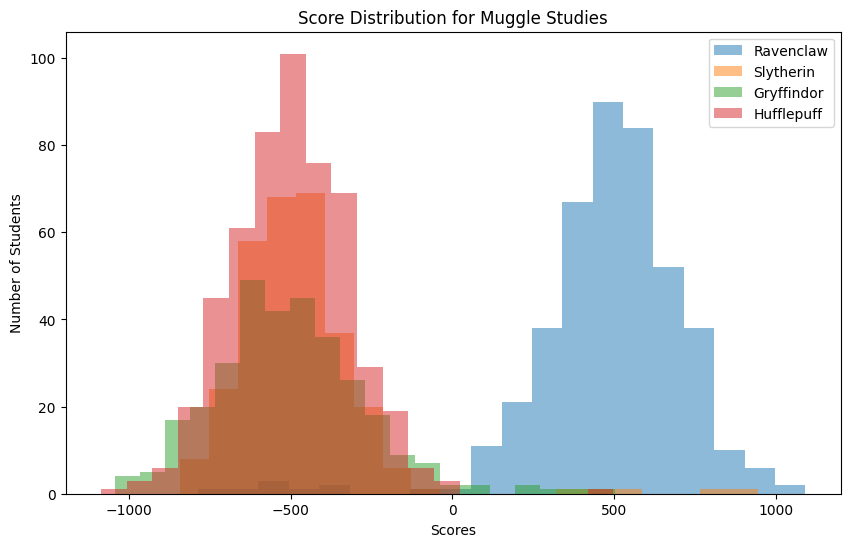

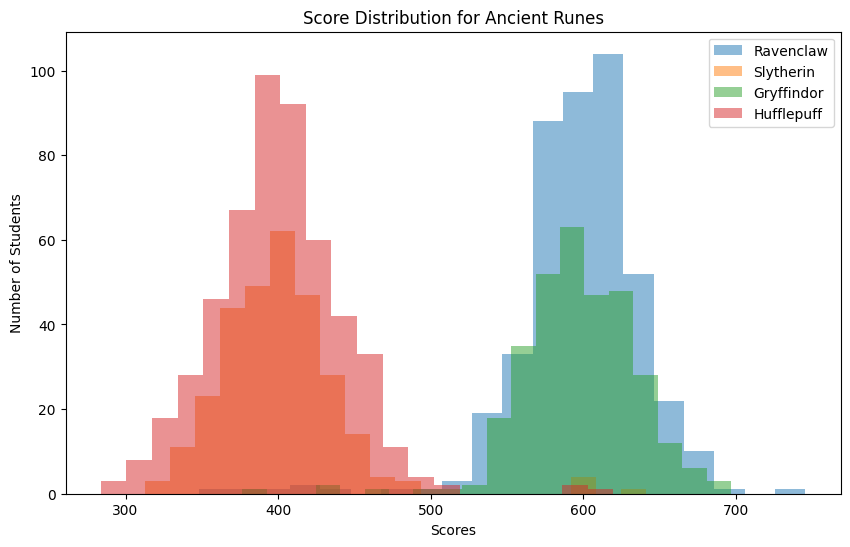

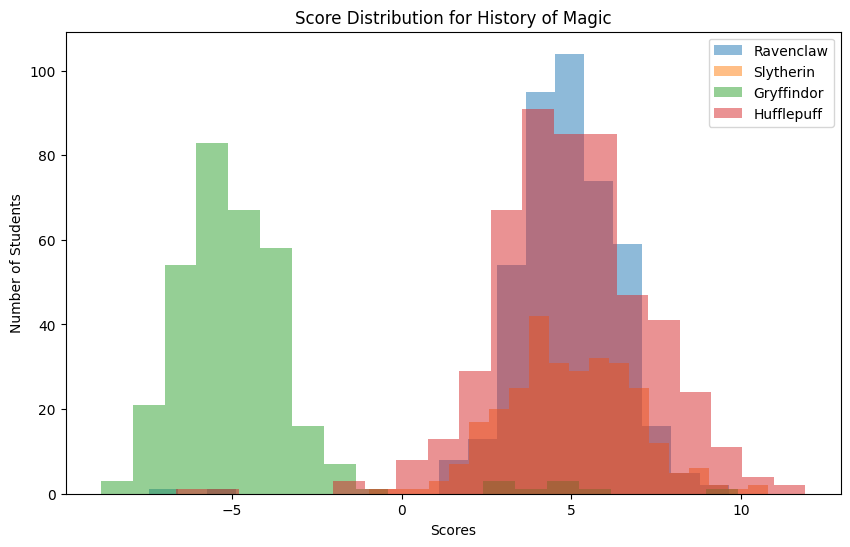

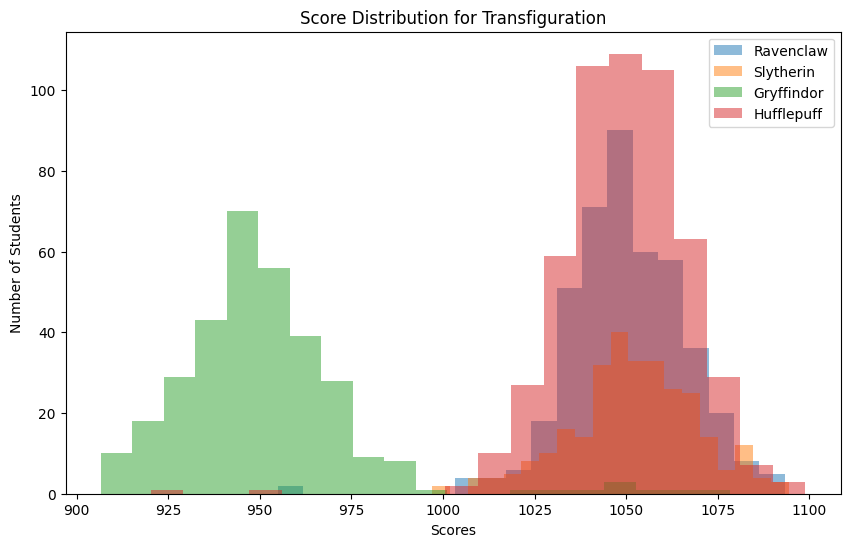

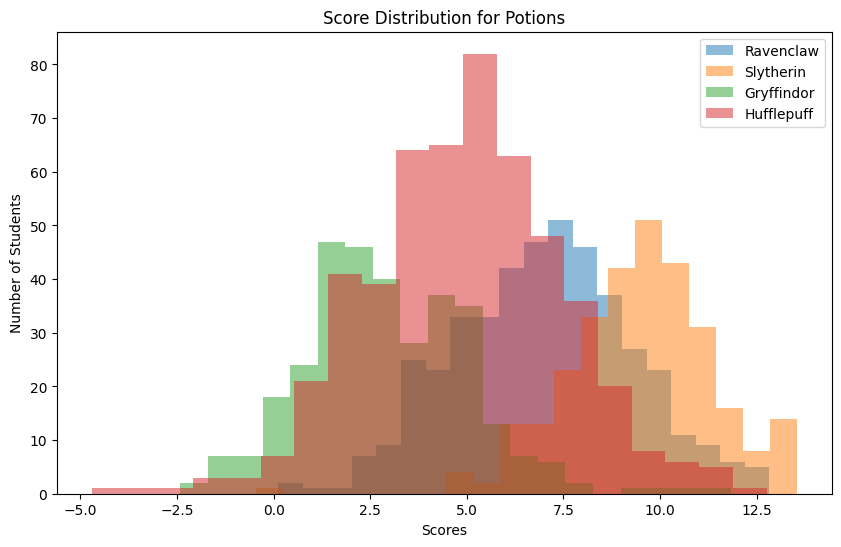

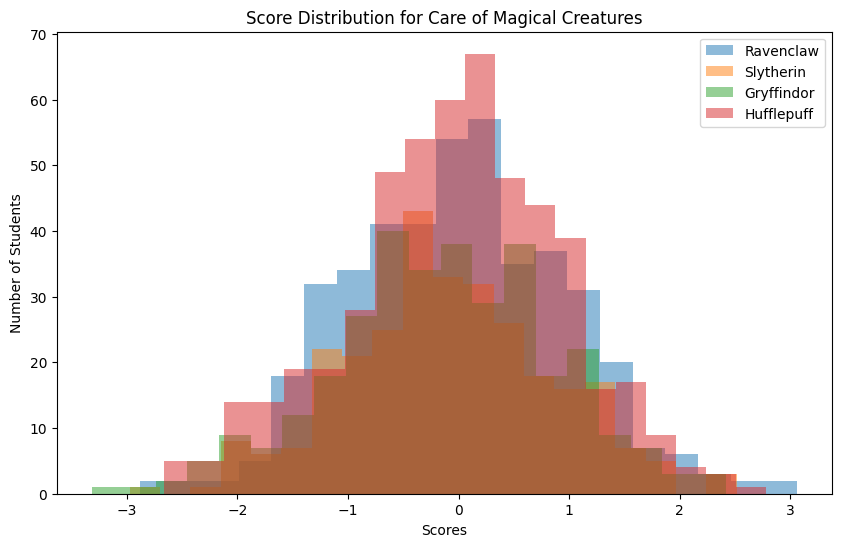

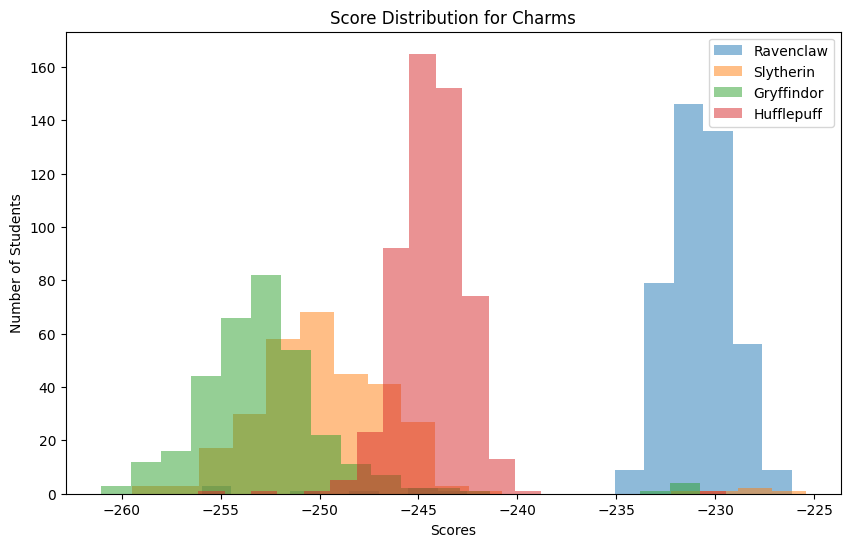

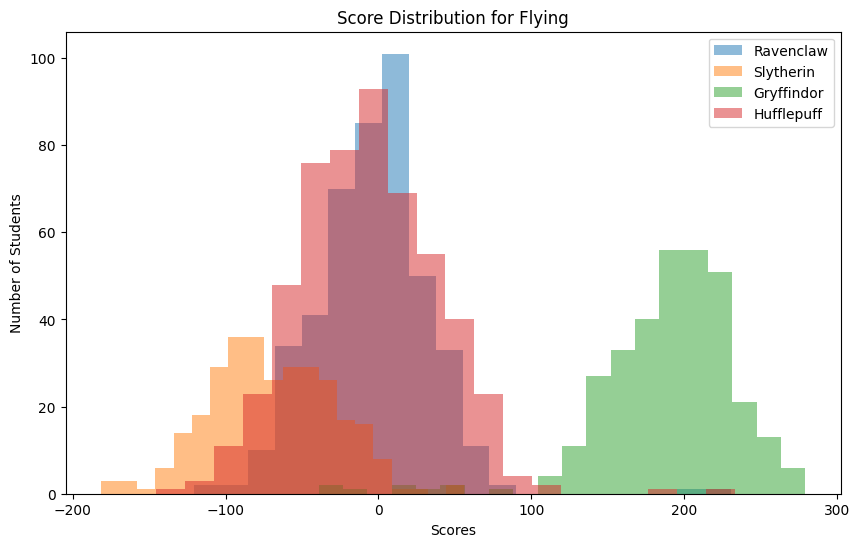

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class dslr:
    def __init__(self, path) -> None:
        self.df = pd.read_csv(path)

    def describe(self) -> pd.DataFrame:        
        df = self.df.select_dtypes(include='number')
        df = df.drop(['Index'], axis=1)
        df = df.dropna(axis=1, how='all')
        results = {}
        
        for column_name, column_data in df.items():
            values = column_data.dropna().values
            sorted_values = np.sort(values)
            count = len(sorted_values)
            mean = np.sum(sorted_values) / count
            std = np.sqrt(np.sum((sorted_values - mean) ** 2) / count)
            min_val = sorted_values[0]
            q25 = np.percentile(sorted_values, 25)
            q50 = np.percentile(sorted_values, 50)
            q75 = np.percentile(sorted_values, 75)
            max_val = sorted_values[-1]
            
            results[column_name] = {
                "Count": count,
                "Mean": mean,
                "Std": std,
                "Min": min_val,
                "25%": q25,
                "50%": q50,
                "75%": q75,
                "Max": max_val
            }
        
        return pd.DataFrame(results)
    
    def histogram(self):        
        houses = self.df['Hogwarts House'].unique()
        courses = self.df.columns.drop(['Index', 'Hogwarts House', 'First Name', 'Last Name', 'Birthday', 'Best Hand'])
        
        for course in courses:
            plt.figure(figsize=(10, 6))
            for house in houses:
                course_scores = self.df[self.df['Hogwarts House'] == house][course].dropna()
                plt.hist(course_scores, alpha=0.5, label=house, bins=20)
            plt.title(f'Score Distribution for {course}')
            plt.xlabel('Scores')
            plt.ylabel('Number of Students')
            plt.legend()
            plt.show()
        
        
    
test = dslr("datasets/dataset_train.csv")
test.histogram()